In [40]:
import pandas as pd
import numpy as np
import pymorphy2
from matplotlib import pylab as pl
import sklearn 
%pylab inline
#from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score

Populating the interactive namespace from numpy and matplotlib


In [307]:
#делаем предположение о том, что от единицы измерения, содержащейся в названии, зависит тип упаковки
#выносим в отдельный параметр единицу измерения
import re
def signature (row) :
    if re.search(r'[\d\s]г', row['name']) : #граммы после числа или пробела
        return 1
    if re.search(r'[\d\s]л', row['name']) : #литры после числа или пробела
        return 2
    if re.search(r'[\d\s]мл', row['name']) : #миллилитры после числа или пробела
        return 3
    if re.search(r'[\d\s]кг', row['name']) : #килограммы после числа или пробела
        return 4
    return 0

In [308]:
def to_lower(row) :
    return row['name'].lower()

In [309]:
df_train = pd.read_csv('train.csv')

In [310]:
#приводим текст к одному регистру
df_train['name'] = df_train.apply (lambda row: to_lower(row), axis=1)

In [311]:
df_train['signature'] = df_train.apply (lambda row: signature(row), axis=1)
df_train

,id,name,tare,signature
0,0,котлеты млм из говядины 335г,коробка,1
1,1,победа вкуса конфеты мишки в лесу 250г(кф побе...,коробка,1
2,2,"творог (юнимилк) ""простоквашино"" зерненый 130г...",стаканчик,1
3,3,сыр плавленый веселый молочник с грибами 190г ...,контейнер,1
4,4,жевательный мармелад маша и медведь буквы 100г,пакет без формы,1
5,5,напиток lipton черный чай б/алк персик 2л пэт,бутылка,2
6,6,сыр valio голландский 140г 45% нарезка,лоток,1
7,7,"вино вилла феличи бел п/сл 10-12 % 0,75л",бутылка,2
8,8,продукт сырный к чаю 200г 50% сливочный,контейнер,1
9,9,свиные 300гр ву жк,вакуумная упаковка,1


In [312]:
#проверяем количество позиций с неопределенной единицей измерения
#составляет не очень большой процент от общего числа позиций
df_train.id[df_train.signature == 0].count()

2808

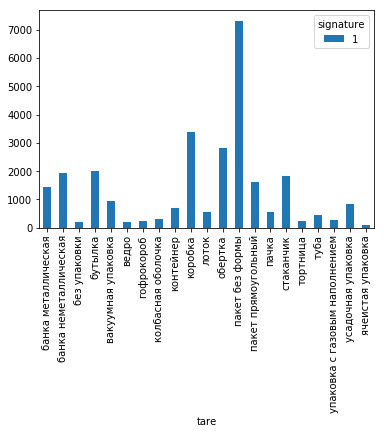

In [313]:
#основную часть позиций с единицей измерения "граммы" составляют пакеты без формы, коробки и обертки
df_train[df_train.signature == 1].pivot_table('id', 'tare', 'signature', 'count').plot(kind='bar', stacked=True)

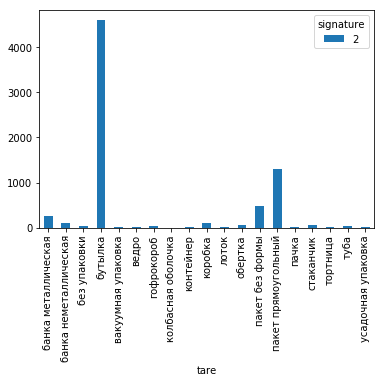

In [314]:
#основную часть позиций с единицей измерения "литры" составляют бутылки - предположение подтверждается
df_train[df_train.signature == 2].pivot_table('id', 'tare', 'signature', 'count').plot(kind='bar', stacked=True)

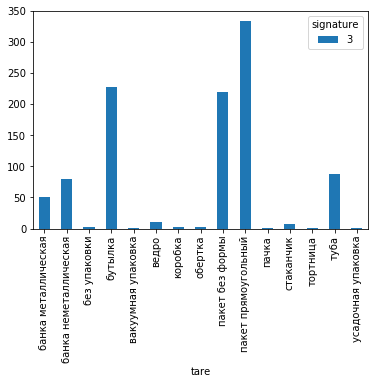

In [315]:
#с "миллилитрами" ситуация несколько хуже, тем не менее, определенные корреляции присутствуют
df_train[df_train.signature == 3].pivot_table('id', 'tare', 'signature', 'count').plot(kind='bar', stacked=True)

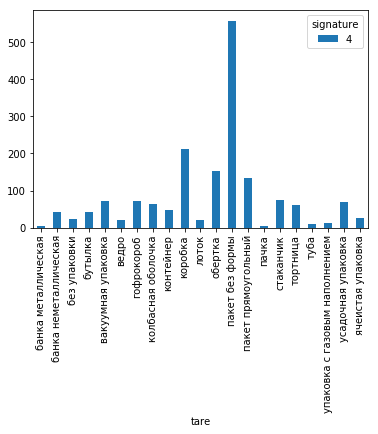

In [316]:
#основную часть позиций с единицей измерения "килограммы" составляют пакеты без формы - неплохой результат
df_train[df_train.signature == 4].pivot_table('id', 'tare', 'signature', 'count').plot(kind='bar', stacked=True)

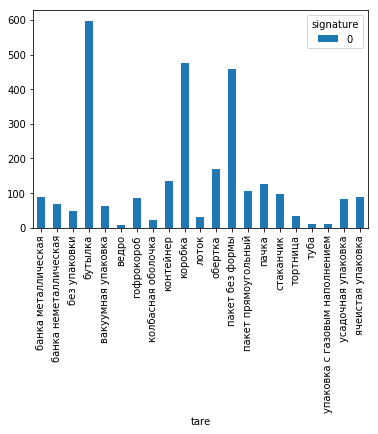

In [317]:
#проверяем, как распределены типы упаковки с неопределенной единицей измерения
#можно пренебречь не очень хорошим распеределнием - процент позиций с нулем невелик
df_train[df_train.signature == 0].pivot_table('id', 'tare', 'signature', 'count').plot(kind='bar', stacked=True)

In [318]:
#делаем вывод, что введенный признак информативен, его можно оставить
#Попробуем выделить еще один признак - наличие символа "%", который может оказаться характеризующим
import re
def percent (row):
    if re.search(r'%', row['name'].lower()) :
        return 1
    return 0
df_train['percent'] = df_train.apply (lambda row: percent(row), axis=1)

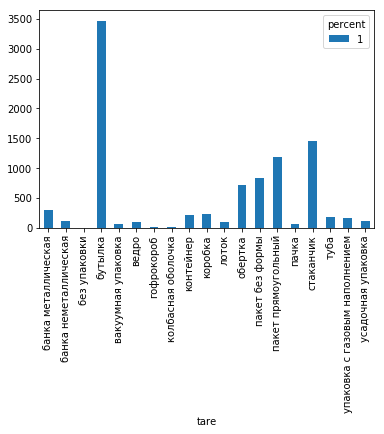

In [319]:
#делаем вывод о том, что признак достаточно информативен, можно использовать - наличие символа процента в названии
#характеризует бутылку
df_train[df_train.percent == 1].pivot_table('id', 'tare', 'percent', 'count').plot(kind='bar', stacked=True)

In [332]:
#отделим единицы измерения от чисел (чтобы при токенизации единицы измерения считались за отдельные слова) и заменим "г" на "гр"
#аналогично с символом "%"
import re
def refactor (row) :
    s = row['name']
    
    s = re.sub(r'(\d)(г|(мл)|л)', r'\1 \2', s)
        
    s = re.sub(r'(\d)(%)', r'\1 \2', s)
    
    s = re.sub(r'(\s)(г)(\s|$|.)', ' гр ', s)
    
    return s

In [333]:
df_train['name'] = df_train.apply (lambda row: refactor(row), axis=1)
df_train

,id,name,tare,signature,percent
0,0,котлеты млм из гр вядины 335 гр,коробка,1,0
1,1,победа вкуса конфеты мишки в лесу 250 гр кф по...,коробка,1,0
2,2,"творогр (юнимилк) ""простоквашино"" зерненый 130...",стаканчик,1,1
3,3,сыр плавленый веселый молочник с гр ибами 190 ...,контейнер,1,0
4,4,жевательный мармелад маша и медведь буквы 100...,пакет без формы,1,0
5,5,напиток lipton черный чай б/алк персик 2 л пэт,бутылка,2,0
6,6,сыр valio гр лландский 140 гр 45 % нарезка,лоток,1,1
7,7,"вино вилла феличи бел п/сл 10-12 % 0,75 л",бутылка,2,1
8,8,продукт сырный к чаю 200 гр 50 % сливочный,контейнер,1,1
9,9,свиные 300 гр ву жк,вакуумная упаковка,1,0


In [336]:
#параметр id не может использоваться для классификации - неинформативный признак, его можно отбросить
Y_train = df_train['tare']

In [337]:
data_in_numpy = df_train['name'].values

In [363]:
#векторизуем текст
#параметр частотности можно не выделять - предложения короткие
#hasheng vectorizer хорош тем, что нормализует данные, что полезно при использовании SVM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = CountVectorizer(ngram_range=(1,2))
X_train = count_vect.fit_transform(data_in_numpy)
# tfidf_vect = TfidfVectorizer()
# X_train = tfidf_vect.fit_transform(data_in_numpy)
# hash_vect = HashingVectorizer(ngram_range=(1,2), n_features=55000)
# X_train = hash_vect.fit_transform(data_in_numpy)
X_train

<40648x98691 sparse matrix of type '<class 'numpy.int64'>'
	with 508901 stored elements in Compressed Sparse Row format>

In [370]:
#selecting parameters using etc
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = LinearSVC()
clf = clf.fit(X_train, Y_train)
model = SelectFromModel(clf, prefit=True)
x_train_new = model.transform(X_train)
x_train_new            

<40648x34755 sparse matrix of type '<class 'numpy.int64'>'
	with 397714 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
def outliers_det(X):
    LOF = LocalOutlierFactor()
    is_inl=LOF.fit_predict(X)
    return is_inl
x_train_cln = x_train_new[outliers_det(x_train_new)==1,:]
y_train_cln = Y_train[outliers_det(x_train_new)==1]
x_train_cln

In [ ]:
#добавляем выделенные нами параметры к данным для обучения
# from scipy.sparse import hstack
# X_train = hstack((X_train,np.array(df_train['signature'])[:,None]))
# X_train = hstack((X_train,np.array(df_train['percent'])[:,None]))
# X_train

In [ ]:
#создание пайплайна
#на разреженных данных обычно неплохо показывает себя SVM
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

estimators = [('svd', TruncatedSVD()), ('norm', StandardScaler()), ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))]

pipe =  Pipeline(estimators)

In [ ]:
#задание сетки параметров
param_grid = dict(
                #mms=[MinMaxScaler(), None],
                #fa=[FactorAnalysis()],
                #fa__n_components=[5],
                #fa__svd_method=['randomized'],
                #fa__iterated_power=[1],
                #clf=[MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]
                svd=[None, ],
                #svd__n_components = [120],
                norm=[None],
                #normalize=[Normalizer()],
                clf=[LinearSVC()]
                #clf__C=range(5,6),
                #clf__kernel=['linear'],
                #clf__class_weight=['balanced']
                )

In [ ]:
#подбор гиперпараметров с помощью сетки параметров и кросс-валидации 
#(метрика качества соответствует условиям - accuracy)
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(x_train_new, Y_train)
grid_search.best_params_

In [374]:
#точность распознавания
grid_search.best_score_

0.8781243849635898

In [271]:
#точность на обучающей выборке для оценки переобученности
clf = grid_search.best_estimator_
clf.score(X_train, Y_train)

0.9708472741586301

In [ ]:
#0.7484 RandomForestClassifier
#0.8195729187167881 SVC 5000 features
#0.8545315882700256 SVC countvectorizer
#0.8403365479236371 SVC 15000 features(hash)
#0.5620940759692974 SVC 300 features + tokenization
#0.866364888801417 SVC count + ngrams range(1,2)
#0.8781243849635898 SVC + feature selecting